# Hopfield Newtorks

###### Simple implementation of a Hopfield network used to restore randomly generated images of corrupted rectangles


Note: The bias term is always assumed to be zero here. There is however no loss in generality since it is not a learnable parameter and acts as a constant effect in the total network energy. 

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

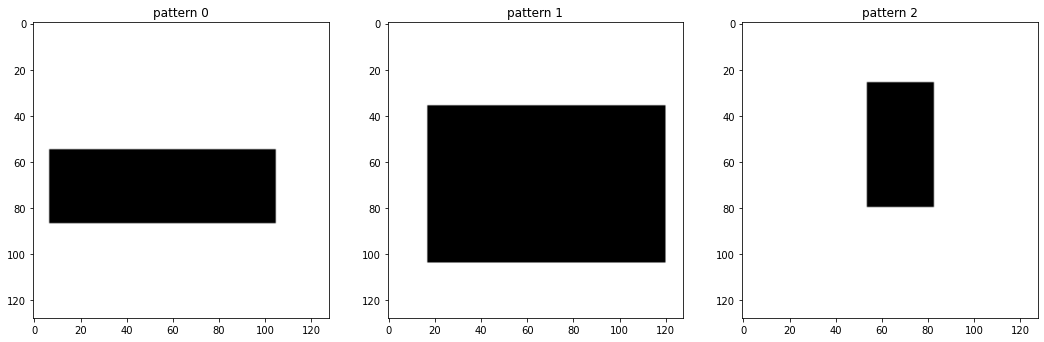

In [14]:
#patterns to store
howmany = 3

def base_patterns(n=1, x=64, y=64):
    res = []
    fig, ax = plt.subplots(1,n, figsize=(18,6))
    try:
        axes = ax.ravel()
    except: #when n == 1
        axes = []
        axes.append(ax)
    for i in range(n):
        im = -np.ones((x,y))
        im[np.random.randint(0,y/2):np.random.randint(x/2,y),
           np.random.randint(0,y/2):np.random.randint(x/2,y)] = 1
        axes[i].imshow(im,cmap='binary')
        axes[i].set_title('pattern {}'.format(i))
        im = np.reshape(im, (x*y))
        res.append(im)
    return np.array(res).T

def energy(state, W):
    return -0.5 * state @ W @ state

width = 128
height = 128
X = base_patterns(howmany,width,height)

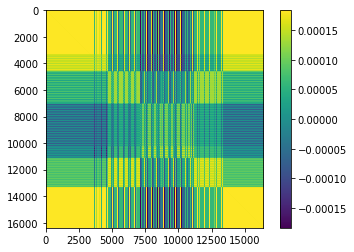

In [15]:
# we build the weight matrix like this, c being the "learning rate"
c = 1
M = c*(1/(width*height))* (X @ X.T)
# we also need to zero the diagonal
np.fill_diagonal(M,0)
plt.imshow(M)
plt.colorbar()

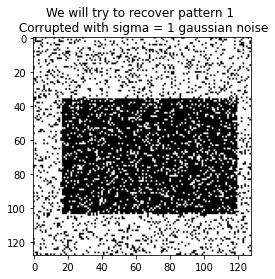

In [25]:
# corrupted pattern to recover
which = np.random.randint(0, howmany)
# how corrupted 
sigma = 1
vt = X[:,which] + sigma*np.random.randn((width*height))
vt[vt > 0] = 1
vt[vt < 0] =-1

plt.imshow(np.reshape(vt, (width,height)),cmap='binary')
title = 'We will try to recover pattern {} \n Corrupted with sigma = {} gaussian noise'.format(which, sigma)
_ = plt.title(title)


In [26]:
# save the evolution
ev = []
en = []
energy_old = np.infty
energy_new = energy(vt, M)
steps = 200
iteration = 0
# we keep running until we reach the lowest energy level
while (energy_old > energy_new) and iteration < steps: 
    iteration += 1
    energy_old = energy_new
    ev.append(np.copy(vt))
    en.append(energy_old)
    # -------------------------------------------------
    # This is asynchronous update v1
    # for ind in np.random.permutation(range(len(vt))):
    #    vt[ind] = np.sign(M[ind,:] @ vt) 
    # -------------------------------------------------
    # This is asynchronous update v2
    for pixel in np.split(np.random.randint(0,len(vt),width*height), 8):
        vt[pixel] = np.sign(M[pixel,:] @ vt)
    # -------------------------------------------------
    # This is synchronous update
    #vt = np.sign(M @ vt)
    # -------------------------------------------------
    energy_new = energy(vt, M)
print('Stopped at iteration {}'.format(iteration))

Stopped at iteration 8


In [6]:
"""fig, ax = plt.subplots(1,len(ev), figsize=(18,6))
axes = ax.ravel()
fig.suptitle('Trying to reconstruct pattern {} lowering network energy'.format(which))
for idx in range(len(ev)):
    axes[idx].imshow(np.reshape(ev[idx], (width,height)),cmap='binary')
    axes[idx].set_title('Iteration {} \n Net. energy: {:.2f}'.format(idx, en[idx]))"""

"fig, ax = plt.subplots(1,len(ev), figsize=(18,6))\naxes = ax.ravel()\nfig.suptitle('Trying to reconstruct pattern {} lowering network energy'.format(which))\nfor idx in range(len(ev)):\n    axes[idx].imshow(np.reshape(ev[idx], (width,height)),cmap='binary')\n    axes[idx].set_title('Iteration {} \n Net. energy: {:.2f}'.format(idx, en[idx]))"

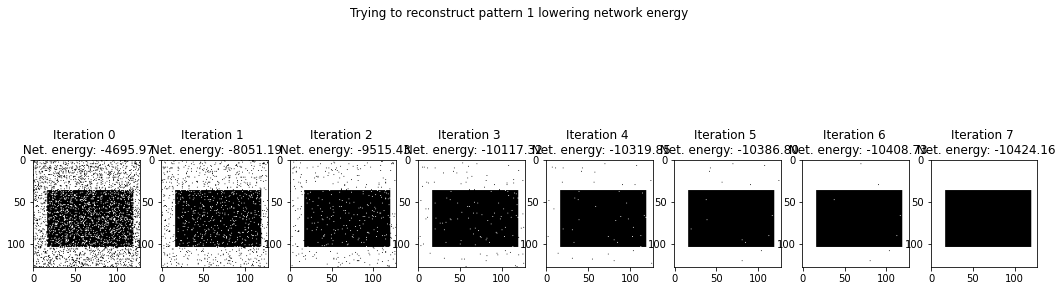

In [27]:
show_every = 1
fig, ax = plt.subplots(1,int(len(ev)//show_every), figsize=(18,6))
axes = ax.ravel()
fig.suptitle('Trying to reconstruct pattern {} lowering network energy'.format(which))
plot_idx = 0
for idx in range(len(ev)):
    if (idx%show_every)==0:
        axes[plot_idx].imshow(np.reshape(ev[idx], (width,height)),cmap='binary')
        axes[plot_idx].set_title('Iteration {} \n Net. energy: {:.2f}'.format(idx, en[idx]))
        plot_idx += 1

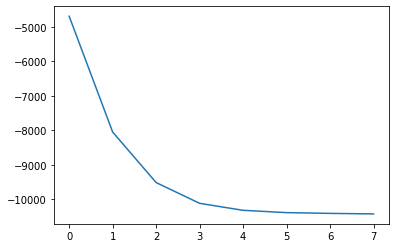

In [28]:
# energy decreases monotonically at every iteration
plt.plot(en)